<a href="https://colab.research.google.com/github/sripriyakonjarla/Machine_Learning/blob/main/lab_session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()

Saving purchaseData2.xlsx to purchaseData2.xlsx


In [39]:
import pandas as pd
import io
import numpy as np

def segregate1(df1):
  a1 = df1["Candies (#)"]
  a2 = df1["Mangoes (Kg)"]
  a3 = df1["Milk Packets (#)"]
  A = np.column_stack((a1, a2, a3))
  return A

def segregrate2(df1):
  c1 = df1["Payment (Rs)"]
  C = c1.values
  return C

def pseudo_inverse(A, C):
  A_pi = np.linalg.pinv(A)
  B = A_pi.dot(C)
  return B

def find_rank(A):
  rank = np.linalg.matrix_rank(A)
  return rank

def find_behavior(C):
  behavior = []
  for pay in C:
    if pay>200:
      behavior.append("Rich")
    else:
      behavior.append("Poor")
  return behavior



#question A1
data1 = pd.read_excel(io.BytesIO(uploaded['purchaseData2.xlsx']))
df1= pd.DataFrame(data1)
#segregating the data into 2 matrices in the form AX=C.
A = segregate1(df1)
print(A)
C = segregrate2(df1)
print(C)
#using pseudo-inverse to find cost of each product.
B = pseudo_inverse(A, C)
print("Cost of candies= Rs.", round(B[0]))
print("Cost of mangoes= Rs.", round(B[1]))
print("Cost of milk packets= Rs.", round(B[2]))
#dimensionality of the vector space is given by the rank of the matrix.
rank= find_rank(A)
print("Dimensionality of the vector space= ", rank)
num = rank
#the number of vectors in the vector space is equal to the rank.
print ("No. of vectors= ", num)
#rank
print("Rank of the matrix A= ", rank)

#question A2
behavior = find_behavior(C)
df1["Behavior"] = behavior
print(df1)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[386 289 393 110 280 167 271 274 148 198]
Cost of candies= Rs. 1
Cost of mangoes= Rs. 55
Cost of milk packets= Rs. 18
Dimensionality of the vector space=  3
No. of vectors=  3
Rank of the matrix A=  3
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Behavior
0      C_1           20             6                 2           386     Rich
1      C_2           16             3                 6           289     Rich
2      C_3           27             6                 2           393     Rich
3      C_4           19             1                 2           110     Poor
4      C_5           24             4                 2           280     Rich
5      C_6           22             1                 5           167     Poor
6      C_7           15             4                 2           271     Rich
7      C_8           18             4         

In [38]:
uploaded = files.upload()

Saving IRCTC Stock Price.xlsx to IRCTC Stock Price.xlsx


Mean=  1560.663
Variance=  58732.365
Mean of Wednesdays=  1550.706
The population mean is 977.655 times larger than the mean price of all Wednesdays
Mean of April=  1698.953
The population mean is 892.347 times larger than the mean price of the month April
Probability of loss over a stock: 0.498
Probability of making a profit on Wednesday: 0.201
Conditional probability of making a profit given that today is Wednesday: 0.42


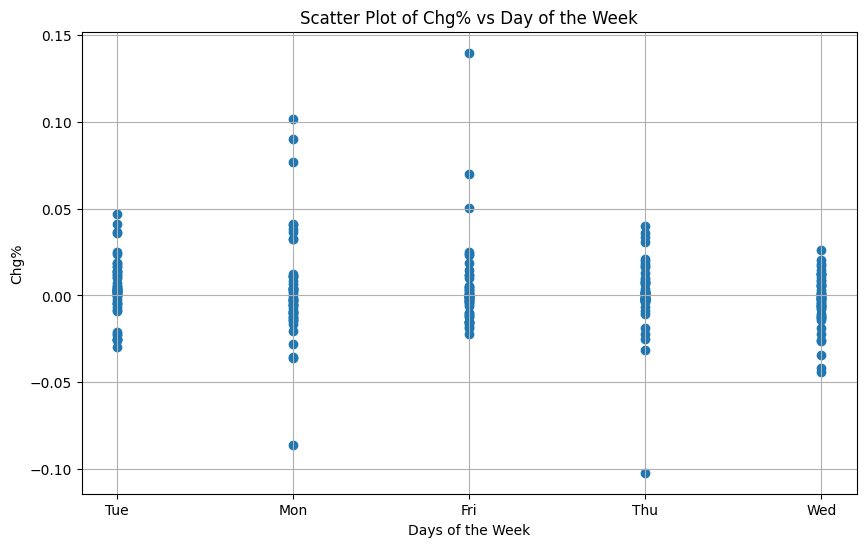

In [41]:
import statistics
import matplotlib.pyplot as plt
import pandas as pd

def calc_mean(df2):
  mean = statistics.mean(df2['Price'])
  return mean

def calc_var(df2):
  var = statistics.variance(df2['Price'])
  return var

def calc_meanValue(row_value, str):
  price = []
  for i in range(len(row_value)):
    if row_value.iloc[i] == str:
      price.append(df2["Price"].iloc[i])
  if price:
    return statistics.mean(price)
  else:
    return "None"

def calc_popMean(df2):
  volumes_in_thousands = []
  for volume in df2['Volume']:
    if volume[-1] == 'M':
      volumes_in_thousands.append(float(volume[:-1]) * 1000000 / 1000)
    elif volume[-1] == 'K':
      volumes_in_thousands.append(float(volume[:-1]) * 1000 / 1000)
  return statistics.mean(volumes_in_thousands)

def prob_loss(df2):
  neg_chg = df2["Chg%"].apply(lambda x: x < 0).sum()
  total_days = len(df2["Chg%"])
  return neg_chg / total_days

def prob_wed(df2):
  wed = 0
  for i in range(len(df2["Day"])):
    if df2["Day"].iloc[i] == "Wed":
      wed +=1
  return wed / len(df2["Day"])

def prob_prof(df2, row_value, str):
  prof = []
  for i in range(len(row_value)):
    if row_value.iloc[i] == str:
      prof.append(df2["Chg%"].iloc[i])
  if prof:
    prf_chg = sum(x > 0 for x in prof)
  return prf_chg / len(prof)

#question A3
data2 = pd.read_excel(io.BytesIO(uploaded2['IRCTC Stock Price.xlsx']))
df2= pd.DataFrame(data2)
#calculating the mean and variance of the values in column D.
mean = calc_mean(df2)
print("Mean= ", round(mean,3))
var = calc_var(df2)
print("Variance= ", round(var,3))
#calculating the mean for the price data of all Wednesdays.
day_value = df2["Day"]
mean_price_wed = calc_meanValue(day_value,"Wed")
print("Mean of Wednesdays= ", mean_price_wed)
#calculating the population mean.
pop_mean = calc_popMean(df2) * 1000
#comparing the population mean over the mean of the price of all Wednesdays.
print("The population mean is", round(pop_mean/mean_price_wed,3), "times larger than the mean price of all Wednesdays")
#calculating the mean for the price data of the month April.
month_value = df2["Month"]
mean_price_april = calc_meanValue(month_value,"Apr")
print("Mean of April= ", round(mean_price_april,3))
#comparing the population mean over the mean of the price in April.
print("The population mean is", round(pop_mean/mean_price_april,3), "times larger than the mean price of the month April")
#finding the probability of making a loss over the stock.
prob = prob_loss(df2)
print("Probability of loss over a stock:", round(prob,3))
#finding the probability of making a profit on Wednesday.
prob2 = prob_wed(df2)
print("Probability of making a profit on Wednesday:", round(prob2,3))
#finding the conditional probability of making profit, given that today is Wednesday.
prob3 = prob_prof(df2, day_value, "Wed")
print("Conditional probability of making a profit given that today is Wednesday:", prob3)
#scatter plot of Chg% data against the day of the week.
plt.figure(figsize=(10, 6))
plt.scatter(df2["Day"], df2["Chg%"])
plt.xlabel("Days of the Week")
plt.ylabel("Chg%")
plt.title("Scatter Plot of Chg% vs Day of the Week")
plt.grid(True)
plt.show()

In [42]:
uploaded3 = files.upload()

Saving thyroid0387_UCI.xlsx to thyroid0387_UCI.xlsx


Age, TSH, T3, TT4, T4U, FTI, TBG are the coulmns which are having datatype as numeric and remaining all are noinal
Mean of age=  73.556
Variance of age=  1401800.869
The colums that are having missing values are ['sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']


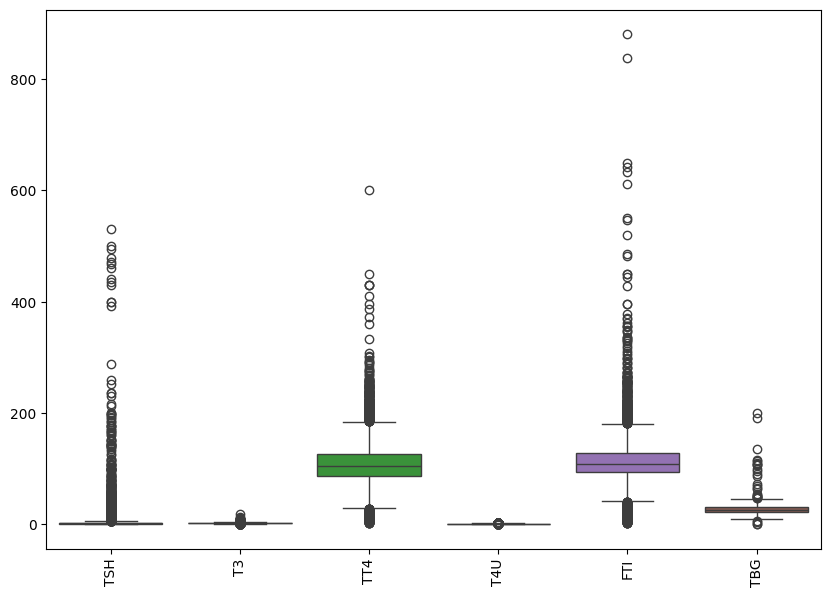

Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
data3 = pd.read_excel(io.BytesIO(uploaded3['thyroid0387_UCI.xlsx']))
df3= pd.DataFrame(data3)
def calc_mean(df3,str):
  mean = statistics.mean(df3[str])
  return mean
def calc_var(df3,str):
  var = statistics.variance(df3[str])
  return var
print("Age, TSH, T3, TT4, T4U, FTI, TBG are the coulmns which are having datatype as numeric and remaining all are noinal")
mean = calc_mean(df3,'age')
print("Mean of age= ", round(mean,3))
var = calc_var(df3,'age')
print("Variance of age= ", round(var,3))
# Replace "?" with NaN
df3.replace('?', np.nan, inplace=True)
missing_cols = df3.columns[df3.isnull().any()].tolist()
print("The colums that are having missing values are",missing_cols)

# Drop the 'Record ID' column (assuming it exists)
df3_filtered = df3.drop(columns=['Record ID','age'], errors='ignore')

# Boxplot to detect outliers
plt.figure(figsize=(10, 7))
sns.boxplot(data=df3_filtered.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

#question A6
df3.replace('?', np.nan, inplace=True)

numerical_cols = df3.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df3.select_dtypes(include=['object']).columns

for col in numerical_cols:
    if df3[col].isnull().any():
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df3[col] < (Q1 - 1.5 * IQR)) | (df3[col] > (Q3 + 1.5 * IQR)))

        if outliers.any():
            df3[col].fillna(df3[col].median(), inplace=True)
        else:
            df3[col].fillna(df3[col].mean(), inplace=True)

for col in categorical_cols:
    if df3[col].isnull().any():
        df3[col].fillna(df3[col].mode()[0], inplace=True)
print(df3.isnull().sum())

